In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Load data file --> without second header row (only necessary for data_flash.xlsx)
df = pd.read_excel('Data/data_manufacturing.xlsx')

In [3]:
df

,API Particle Size,Mill Time,Screen Size,MgSt Supplier,Lactose Supplier,Sugar Supplier,Talc Supplier,Blend Time,Blend Speed,Compressor,Force,Coating Supplier,Coating Viscosity,Inlet Temp,Exhaust Temp,Spray Rate,Atom. Pressure,Dissolution
0,Small,27,4,Smith Ind,James Ind,Sour,Rough,16.043199,59.887383,COMPRESS2,25.466691,Mac,105.361158,107.945228,70.458995,404.603294,61.007068,79.86
1,Small,11,5,Jones Inc,James Ind,Sour,Smooth,14.361549,59.793030,COMPRESS2,24.934062,Mac,100.232484,107.540101,70.823684,407.367163,60.571220,72.82
2,Small,20,4,Jones Inc,Bond Inc,Sour,Rough,14.458745,60.797487,COMPRESS2,25.503908,Down,100.271603,106.605861,69.197350,399.301868,59.088228,74.18
3,Small,13,3,Smith Ind,Bond Inc,Sweet,Smooth,14.412131,59.398624,COMPRESS1,24.787632,Mac,98.008134,106.093734,68.809087,403.733927,58.844630,69.14
4,Small,13,5,Smith Ind,James Ind,Sweet,Smooth,16.111780,59.921639,COMPRESS2,25.316775,Down,97.582630,108.257381,69.447385,396.709347,59.589137,73.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Large,5,4,Smith Ind,James Ind,Sour,Smooth,13.836013,59.105242,COMPRESS2,25.329694,Coat,101.600640,107.945423,69.915316,401.016280,61.196363,70.58
86,Large,14,3,Smith Ind,Bond Inc,Sweet,Rough,16.963847,61.302848,COMPRESS2,24.578408,Coat,102.168031,107.372107,70.598444,402.636540,59.608586,69.70
87,Large,9,5,Smith Ind,Bond Inc,Sour,Rough,16.505517,61.216797,COMPRESS2,25.013860,Mac,94.154164,107.142674,69.645683,398.417407,61.742415,77.22
88,Large,24,4,Smith Ind,James Ind,Sour,Smooth,15.339437,60.448580,COMPRESS1,25.306691,Down,92.519135,107.320049,70.785988,404.073722,61.721232,78.58


In [4]:
df.dtypes

API Particle Size     object
Mill Time              int64
Screen Size            int64
MgSt Supplier         object
Lactose Supplier      object
Sugar Supplier        object
Talc Supplier         object
Blend Time           float64
Blend Speed          float64
Compressor            object
Force                float64
Coating Supplier      object
Coating Viscosity    float64
Inlet Temp           float64
Exhaust Temp         float64
Spray Rate           float64
Atom. Pressure       float64
Dissolution          float64
dtype: object

In [5]:
string_col_indices = []
col_idx = df.dtypes.index[df.dtypes=='object']

for i in col_idx:
    column_index = df.columns.get_loc(i)
    string_col_indices.append(column_index)
    
string_col_indices

[0, 3, 4, 5, 6, 9, 11]

In [6]:
df.columns.get_loc('Dissolution')

17

In [7]:
y = df.iloc[:, -1].values #target variable: 'Dissolution'
X = df.iloc[:, :-1].values # features: remaining variables

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), string_col_indices)], remainder='passthrough')
X = np.array(ct.fit_transform(X)).astype('float64')

In [9]:
X

array([[  0.        ,   1.        ,   1.        , ...,  70.45899545,
        404.60329386,  61.00706763],
       [  0.        ,   1.        ,   0.        , ...,  70.8236838 ,
        407.36716339,  60.57121956],
       [  0.        ,   1.        ,   0.        , ...,  69.19734969,
        399.30186834,  59.08822803],
       ...,
       [  0.        ,   0.        ,   1.        , ...,  69.6456833 ,
        398.41740653,  61.74241532],
       [  0.        ,   0.        ,   1.        , ...,  70.78598751,
        404.07372181,  61.72123198],
       [  0.        ,   0.        ,   0.        , ...,  68.34577656,
        397.79182402,  58.99171248]])

In [10]:
y

array([79.86, 72.82, 74.18, 69.14, 73.3 , 72.82, 69.46, 79.46, 74.18,
       77.14, 71.46, 73.86, 80.42, 76.98, 75.14, 68.34, 67.46, 73.78,
       81.14, 71.14, 78.26, 74.26, 76.42, 72.82, 74.42, 78.42, 75.46,
       72.02, 70.66, 67.14, 77.62, 75.86, 66.42, 74.98, 74.18, 70.98,
       67.3 , 70.26, 73.62, 73.3 , 73.14, 72.1 , 69.7 , 72.66, 69.7 ,
       77.38, 74.02, 73.62, 69.86, 74.1 , 68.42, 69.22, 74.1 , 68.42,
       72.26, 74.98, 72.34, 77.86, 71.22, 77.78, 68.18, 72.74, 74.82,
       73.94, 76.9 , 68.5 , 77.54, 70.58, 70.98, 67.22, 69.78, 70.5 ,
       67.94, 72.82, 67.22, 74.5 , 70.26, 73.78, 75.94, 77.14, 70.26,
       70.5 , 69.3 , 66.1 , 69.86, 70.58, 69.7 , 77.22, 78.58, 69.78])

In [11]:
X.reshape(1,-1).shape

(1, 1710)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X, y)

In [13]:
y_pred = regressor.predict(X)

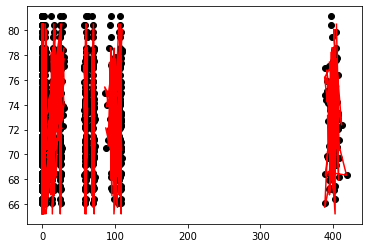

In [14]:
plt.plot(X, y, 'ok');
plt.plot(X, y_pred, '-r');

In [15]:
r_squared = model.score(X, y)
print(r_squared)

0.9195813219425696


In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
RMSE = sqrt(mean_squared_error(y, y_pred))
print(RMSE)
#the smaller the RMSE, the better a model is able to fit the data

1.010255480160136


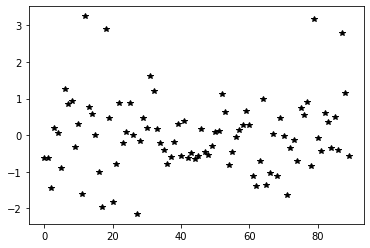

In [17]:
plt.plot(y-y_pred, '*k')

(array([ 5.,  5., 18., 18., 23., 12.,  5.,  0.,  0.,  4.]),
 array([-2.15135762, -1.61102618, -1.07069473, -0.53036329,  0.00996816,
         0.5502996 ,  1.09063105,  1.63096249,  2.17129394,  2.71162538,
         3.25195683]),
 <BarContainer object of 10 artists>)

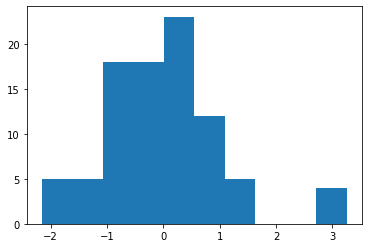

In [18]:
plt.hist(y-y_pred)

In [19]:
model.coef_

array([-0.38245805,  1.20785459,  0.5925156 ,  0.3777475 , -1.68215771,
       -1.12710952, -0.30869882, -0.11289935, -0.16156174,  0.34532681,
        1.45578819,  0.2512283 ,  0.1101957 ,  0.76348441,  0.01915505,
        0.01083696, -0.14969741,  0.00690573,  0.68427162])

In [20]:
model.intercept_

-3.613138137911889

In [21]:
import statsmodels.api as sm # import statsmodels 

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     42.13
Date:                Mon, 16 May 2022   Prob (F-statistic):           7.90e-31
Time:                        20:11:16   Log-Likelihood:                -128.62
No. Observations:                  90   AIC:                             297.2
Df Residuals:                      70   BIC:                             347.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6131     23.258     -0.155      0.877     -50.000      42.774
x1            -0.3825      0.318     -1.202      0.234      -1.017       0.252
x2             1.2079      0.345      3.502      0.001       0.520       1.896
x3             0.5925      0.260      2.278      0.026       0.074       1.111
x4             0.3777      0.264      1.432      0.157      -0.148       0.904
x5            -1.6822      0.274     -6.140      0.000      -2.229      -1.136
x6            -1.1271      0.287     -3.932      0.000      -1.699      -0.555
x7            -0.3087      0.266     -1.161      0.249      -0.839       0.221
x8            -0.1129      0.330     -0.342      0.733      -0.771       0.546
x9            -0.1616      0.341     -0.474      0.637      -0.841       0.518
x10            0.3453      0.017     20.871      0.000       0.312       0.378
x11            1.4558      0.158      9.188      0.000       1.140       1.772
x12            0.2512      0.094      2.687      0.009       0.065       0.438
x13            0.1102      0.158      0.696      0.489      -0.206       0.426
x14            0.7635      0.414      1.846      0.069      -0.061       1.588
x15            0.0192      0.027      0.717      0.476      -0.034       0.072
x16            0.0108      0.134      0.081      0.936      -0.257       0.279
x17           -0.1497      0.131     -1.147      0.255      -0.410       0.111
x18            0.0069      0.026      0.265      0.792      -0.045       0.059
x19            0.6843      0.141      4.844      0.000       0.403       0.966
==============================================================================
Omnibus:                       16.640   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.714
Skew:                           0.850   Prob(JB):                     1.17e-05
Kurtosis:                       4.779   Cond. No.                     8.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""